# **Weight of Evidence (WoE)**

Autor: Sergio Diaz Paredes

Contacto: [Linkedin](https://www.linkedin.com/in/sergio-diaz-paredes/)

## 1. **¿Qué es el WoE?**
El WoE es una transformación estadística que mide la fuerza de separación entre dos grupos, típicamente los "buenos" (clientes que cumplen con sus pagos) y los "malos" (clientes que no cumplen). Se calcula para cada categoría de una variable, convirtiendo valores categóricos o continuos en una escala logarítmica. Esto permite analizar la relación entre una variable independiente y el comportamiento crediticio.

La fórmula del WoE es:

$$
WoE = \ln \left( \frac{\% \text{ de buenos en la categoría}}{\% \text{ de malos en la categoría}} \right)
$$

## 2. **Uso del WoE en Credit Scoring**
En los modelos de credit scoring, como los basados en **Regresión Logística**, el WoE juega un papel importante por varias razones:

### a) **Transformación de Variables:**
   - El WoE convierte variables categóricas o continuas en valores que son directamente utilizables en un modelo lineal.
   - Ayuda a tratar problemas como la no linealidad entre las variables predictoras y el resultado.

### b) **Mejora de la Interpretabilidad:**
   - El WoE facilita la interpretación de las variables. Por ejemplo, un valor alto de WoE para una categoría indica una mayor probabilidad de que los clientes sean buenos.

### c) **Manejo de Sesgos:**
   - Las transformaciones WoE son menos sensibles a valores atípicos, lo que hace que los modelos sean más robustos.

### d) **Detección de Monotonicidad:**
   - Al calcular el WoE, es fácil verificar si existe una relación lógica entre las categorías de una variable y el resultado (monotonicidad). Esto es crucial en scoring, ya que los modelos suelen requerir relaciones consistentes.

- El WoE se usa como entrada al modelo en lugar de los valores originales de la variable.

# Paquetes

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [39]:
link = "https://raw.githubusercontent.com/SergioDP94/CreditScoring/refs/heads/main/Data/credit_risk_dataset.csv"
data = pd.read_csv(link)
data.dropna(inplace=True)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


# WoE con variables cualitativas

## Paso 1: Tabla de frecuencias

In [67]:
t_freq = data.loan_status.value_counts()
t_freq

,count
loan_status,
0,22435
1,6203


## Paso 2: Crear la tabla cruzada

In [68]:
t_cross = pd.crosstab(data['loan_grade'],data['loan_status'])
t_cross

loan_status,0,1
loan_grade,,
A,8498,904
B,7698,1453
C,4542,1157
D,1325,1923
E,308,562
F,63,146
G,1,58


## Paso 3: Crear la tabla cruzada relativa

In [70]:
t_cross_rel = t_cross.div(t_freq, axis=1)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_grade,,
A,0.378783,0.145736
B,0.343125,0.234241
C,0.202452,0.186523
D,0.059060,0.310011
E,0.013729,0.090601
F,0.002808,0.023537
G,0.000045,0.009350


<Axes: xlabel='loan_grade'>

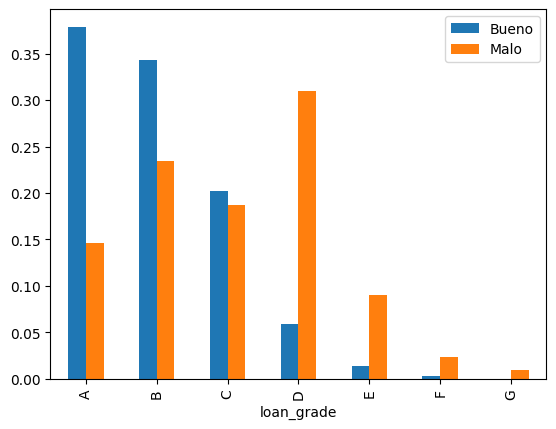

In [72]:
t_cross_rel.plot(kind='bar')

## Paso 4: Calcular ratio logaritmico

In [73]:
t_cross_rel['WoE'] = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
t_cross_rel

,Bueno,Malo,WoE
loan_grade,,,
A,0.378783,0.145736,0.955168
B,0.343125,0.234241,0.381741
C,0.202452,0.186523,0.081948
D,0.059060,0.310011,-1.658063
E,0.013729,0.090601,-1.886991
F,0.002808,0.023537,-2.126061
G,0.000045,0.009350,-5.346032


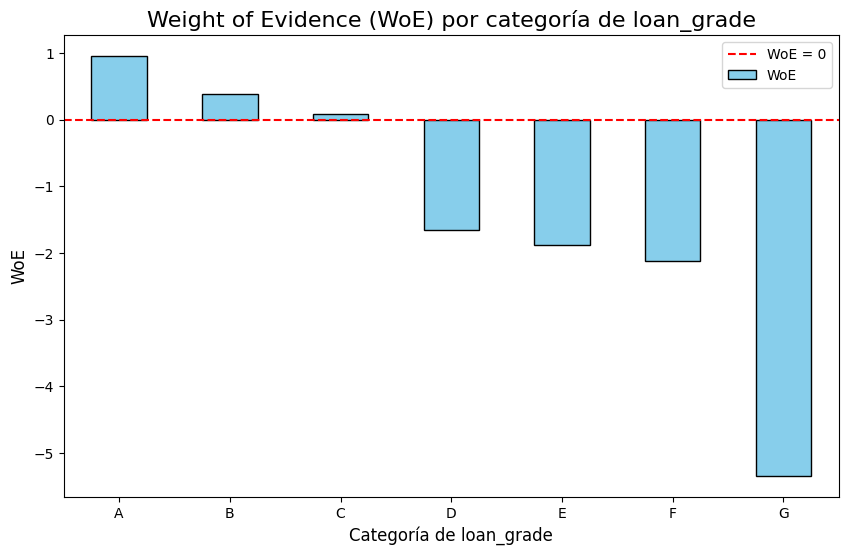

In [74]:
# Crear la gráfica
t_cross_rel.WoE.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))

# Personalizar la gráfica
plt.title('Weight of Evidence (WoE) por categoría de loan_grade', fontsize=16)  # Título
plt.xlabel('Categoría de loan_grade', fontsize=12)  # Etiqueta eje X
plt.ylabel('WoE', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para que se vean mejor

# Agregar línea de referencia (puede ser 0 o cualquier otro valor de interés)
plt.axhline(0, color='red', linestyle='--', label='WoE = 0')  # Línea de referencia en WoE = 0
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.show()

## Paso 5: Aplicando el WoE

In [76]:
WoE_grade_dict = t_cross_rel.WoE.to_dict()
WoE_grade_dict

{'A': 0.9551675668456143,
 'B': 0.38174097683644226,
 'C': 0.0819478020348611,
 'D': -1.6580632006054232,
 'E': -1.8869912603570829,
 'F': -2.12606108875377,
 'G': -5.346032203983385}

In [77]:
data['loan_grade_woe'] = data['loan_grade'].map(WoE_grade_dict)

In [78]:
t_WoE_grade = data.pivot_table(index='loan_grade_woe',values='loan_status').reset_index()
t_WoE_grade.head(10)

,loan_grade_woe,loan_status
0,-5.346032,0.983051
1,-2.126061,0.698565
2,-1.886991,0.645977
3,-1.658063,0.592057
4,0.081948,0.203018
5,0.381741,0.158780
6,0.955168,0.096150


<Axes: xlabel='loan_grade_woe', ylabel='loan_status'>

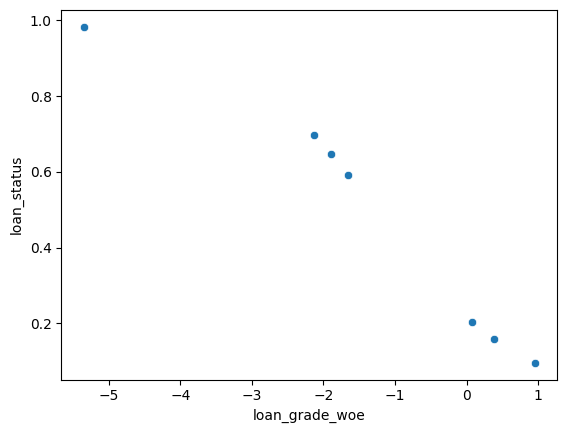

In [79]:
sns.scatterplot(t_WoE_grade,x='loan_grade_woe',y='loan_status')

# WoE con variables cuantitativas

## Paso 1: Discretizando variables

In [50]:
#loan_percent_income

In [80]:
num_cuantiles = 10
data['loan_percent_income_freq'] = pd.qcut(data['loan_percent_income'], q=num_cuantiles, labels=False)
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade_woe,loan_percent_income_freq,loan_percent_income_woe,loan_percent_income2
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,-1.658063,9,-0.917852,9
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.381741,2,1.909543,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0.081948,9,-0.917852,9
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0.081948,9,-0.917852,9
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.081948,9,-0.917852,9


## Paso 2: Tabla de frecuencias

In [81]:
t_freq = data.loan_status.value_counts()
t_freq

,count
loan_status,
0,22435
1,6203


## Paso 3: Crear la tabla cruzada

In [82]:
t_cross = pd.crosstab(data['loan_percent_income_freq'],data['loan_status'])
t_cross

loan_status,0,1
loan_percent_income_freq,,
0,2743,313
1,3187,451
2,2241,332
3,2082,285
4,3091,478
5,1692,341
6,2792,619
7,2063,494
8,1776,967


## Paso 4: Crear la tabla cruzada relativa

In [84]:
t_cross_rel = t_cross.div(t_freq, axis=1)
t_cross_rel.columns = ['Bueno','Malo']
t_cross_rel

,Bueno,Malo
loan_percent_income_freq,,
0,0.122264,0.050459
1,0.142055,0.072707
2,0.099889,0.053522
3,0.092801,0.045946
4,0.137776,0.077059
5,0.075418,0.054973
6,0.124448,0.099790
7,0.091955,0.079639
8,0.079162,0.155892


<Axes: xlabel='loan_percent_income_freq'>

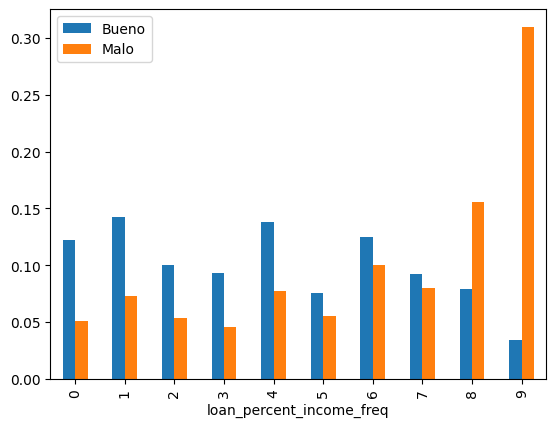

In [86]:
t_cross_rel.plot(kind='bar')

## Paso 5: Calcular ratio logaritmico

In [87]:
t_cross_rel['WoE'] = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
t_cross_rel

,Bueno,Malo,WoE
loan_percent_income_freq,,,
0,0.122264,0.050459,0.885015
1,0.142055,0.072707,0.669779
2,0.099889,0.053522,0.623953
3,0.092801,0.045946,0.703006
4,0.137776,0.077059,0.581050
5,0.075418,0.054973,0.316195
6,0.124448,0.099790,0.220819
7,0.091955,0.079639,0.143792
8,0.079162,0.155892,-0.677669


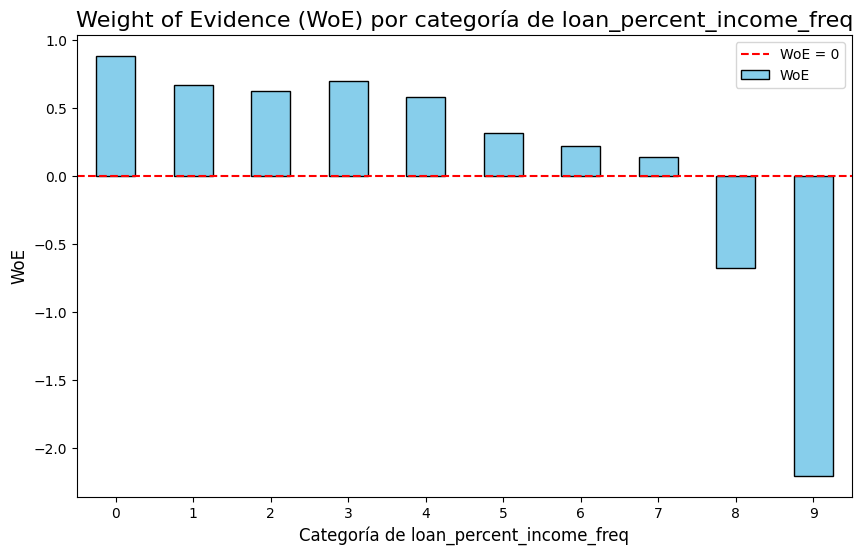

In [88]:
# Crear la gráfica
t_cross_rel.WoE.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(10,6))

# Personalizar la gráfica
plt.title('Weight of Evidence (WoE) por categoría de loan_percent_income_freq', fontsize=16)  # Título
plt.xlabel('Categoría de loan_percent_income_freq', fontsize=12)  # Etiqueta eje X
plt.ylabel('WoE', fontsize=12)  # Etiqueta eje Y
plt.xticks(rotation=0)  # Rotar las etiquetas del eje X para que se vean mejor

# Agregar línea de referencia (puede ser 0 o cualquier otro valor de interés)
plt.axhline(0, color='red', linestyle='--', label='WoE = 0')  # Línea de referencia en WoE = 0
plt.legend()  # Mostrar leyenda

# Mostrar la gráfica
plt.show()

## Paso 6: Aplicando el WoE

In [89]:
WoE_percent_income_dict = t_cross_rel.WoE.to_dict()
WoE_percent_income_dict

{0: 0.8850151069604838,
 1: 0.6697787814776919,
 2: 0.6239533114474722,
 3: 0.7030058754692976,
 4: 0.5810500162036941,
 5: 0.3161948694456856,
 6: 0.22081899776070077,
 7: 0.14379180244636308,
 8: -0.6776687653381452,
 9: -2.203441205878074}

In [90]:
data['loan_percent_income_woe'] = data['loan_percent_income_freq'].map(WoE_percent_income_dict)

In [91]:
t_WoE_percent_income = data.pivot_table(index='loan_percent_income_woe',values='loan_status').reset_index()
t_WoE_percent_income.head(10)

,loan_percent_income_woe,loan_status
0,-2.203441,0.714604
1,-0.677669,0.352534
2,0.143792,0.193195
3,0.220819,0.181472
4,0.316195,0.167732
5,0.581050,0.133931
6,0.623953,0.129032
7,0.669779,0.123969
8,0.703006,0.120406
9,0.885015,0.102421


<Axes: xlabel='loan_percent_income_woe', ylabel='loan_status'>

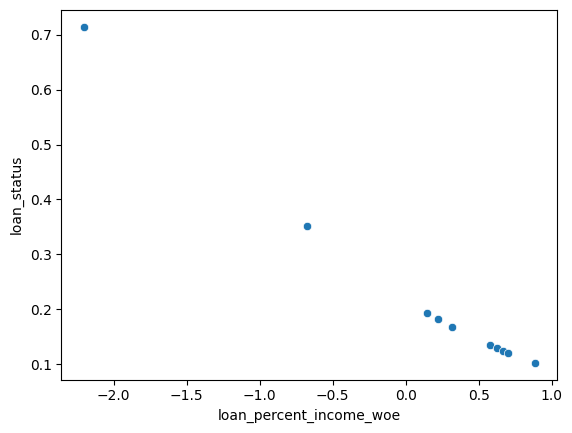

In [92]:
sns.scatterplot(t_WoE_percent_income,x='loan_percent_income_woe',y='loan_status')

In [93]:
data[['loan_status','loan_percent_income_woe','loan_grade_woe']].corr()

,loan_status,loan_percent_income_woe,loan_grade_woe
loan_status,1.000000,-0.419037,-0.416962
loan_percent_income_woe,-0.419037,1.000000,0.113113
loan_grade_woe,-0.416962,0.113113,1.000000


# Automatización

## Función

In [94]:
def get_woe(data,var,number=False):
  if number:
    num_cuantiles = 10
    data[var+'2'] = pd.qcut(data[var], q=num_cuantiles, labels=False, duplicates='drop')
    var = var+'2'
  t_freq = data['loan_status'].value_counts()
  t_cross = pd.crosstab(data[var],data['loan_status'])
  t_cross_rel = t_cross.div(t_freq, axis=1)
  t_cross_rel.columns = ['Bueno','Malo']
  WoE = np.log(t_cross_rel['Bueno']/t_cross_rel['Malo'])
  WoE_dict = WoE.to_dict()
  val_WoE = data[var].map(WoE_dict)
  return val_WoE

In [97]:
data_woe = data[['loan_status']].copy()
data_woe.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


## Verificación

In [98]:
data_woe['loan_percent_income_woe'] = get_woe(data,'loan_percent_income',number=True)
data_woe['loan_grade_woe'] = get_woe(data,'loan_grade',number=False)
data_woe.corr()

,loan_status,loan_percent_income_woe,loan_grade_woe
loan_status,1.000000,-0.419037,-0.416962
loan_percent_income_woe,-0.419037,1.000000,0.113113
loan_grade_woe,-0.416962,0.113113,1.000000


In [99]:
data_woe.head()

,loan_status,loan_percent_income_woe,loan_grade_woe
0,1,-2.203441,-1.658063
1,0,0.623953,0.381741
2,1,-2.203441,0.081948
3,1,-2.203441,0.081948
4,1,-2.203441,0.081948


## Generalización

In [101]:
data = pd.read_csv(link)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [102]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('loan_status')
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [103]:
textual_columns = data.select_dtypes(include=['object']).columns.tolist()
textual_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [105]:
data_woe = data[['loan_status']].copy()
data_woe.head()

,loan_status
0,1
1,0
2,1
3,1
4,1


In [106]:
for var in numerical_columns:
  data_woe[var+'_woe'] = get_woe(data,var,number=True)

In [107]:
for var in textual_columns:
  data_woe[var+'_woe'] = get_woe(data,var,number=False)

In [108]:
data_woe.head()

,loan_status,person_age_woe,person_income_woe,person_emp_length_woe,loan_amnt_woe,loan_int_rate_woe,loan_percent_income_woe,cb_person_cred_hist_length_woe,person_home_ownership_woe,loan_intent_woe,loan_grade_woe,cb_person_default_on_file_woe
0,1,-0.208880,0.178359,0.351826,-0.636639,-1.718700,-2.203441,-0.064213,-0.496432,0.116673,-1.658063,-0.785931
1,0,-0.208880,-1.145505,0.183319,0.078454,0.311913,0.623953,-0.064213,1.354446,0.298399,0.381741,0.219371
2,1,-0.034968,-1.145505,-0.345372,0.177648,0.133697,-2.203441,-0.064213,0.652692,-0.283179,0.081948,0.219371
3,1,0.023041,0.375252,0.025117,-0.636639,-0.914284,-2.203441,-0.064213,-0.496432,-0.283179,0.081948,0.219371
4,1,-0.003839,0.211453,0.238315,-0.636639,-0.914284,-2.203441,-0.035284,-0.496432,-0.283179,0.081948,-0.785931


In [109]:
data_woe.corr()

,loan_status,person_age_woe,person_income_woe,person_emp_length_woe,loan_amnt_woe,loan_int_rate_woe,loan_percent_income_woe,cb_person_cred_hist_length_woe,person_home_ownership_woe,loan_intent_woe,loan_grade_woe,cb_person_default_on_file_woe
loan_status,1.000000,-0.041163,-0.277783,-0.103199,-0.129213,-0.371899,-0.419037,-0.026329,-0.238383,-0.127236,-0.416962,-0.182019
person_age_woe,-0.041163,1.000000,0.159381,0.072806,-0.065285,-0.005537,0.053560,0.588401,0.039671,-0.070232,-0.007383,-0.004835
person_income_woe,-0.277783,0.159381,1.000000,0.196853,-0.313498,0.038278,0.326474,0.087770,0.222321,0.007285,0.029969,0.026996
person_emp_length_woe,-0.103199,0.072806,0.196853,1.000000,-0.079001,0.049410,0.043924,0.061552,0.207310,-0.004539,0.044408,0.032226
loan_amnt_woe,-0.129213,-0.065285,-0.313498,-0.079001,1.000000,0.146834,0.419622,-0.047482,-0.077835,0.007196,0.163894,0.052917
loan_int_rate_woe,-0.371899,-0.005537,0.038278,0.049410,0.146834,1.000000,0.098077,-0.010447,0.102246,0.015180,0.890310,0.490926
loan_percent_income_woe,-0.419037,0.053560,0.326474,0.043924,0.419622,0.098077,1.000000,0.022427,0.082494,0.005053,0.113113,0.029707
cb_person_cred_hist_length_woe,-0.026329,0.588401,0.087770,0.061552,-0.047482,-0.010447,0.022427,1.000000,0.038622,-0.057985,-0.011073,-0.011169
person_home_ownership_woe,-0.238383,0.039671,0.222321,0.207310,-0.077835,0.102246,0.082494,0.038622,1.000000,0.061925,0.089351,0.053008
loan_intent_woe,-0.127236,-0.070232,0.007285,-0.004539,0.007196,0.015180,0.005053,-0.057985,0.061925,1.000000,0.017712,0.007449


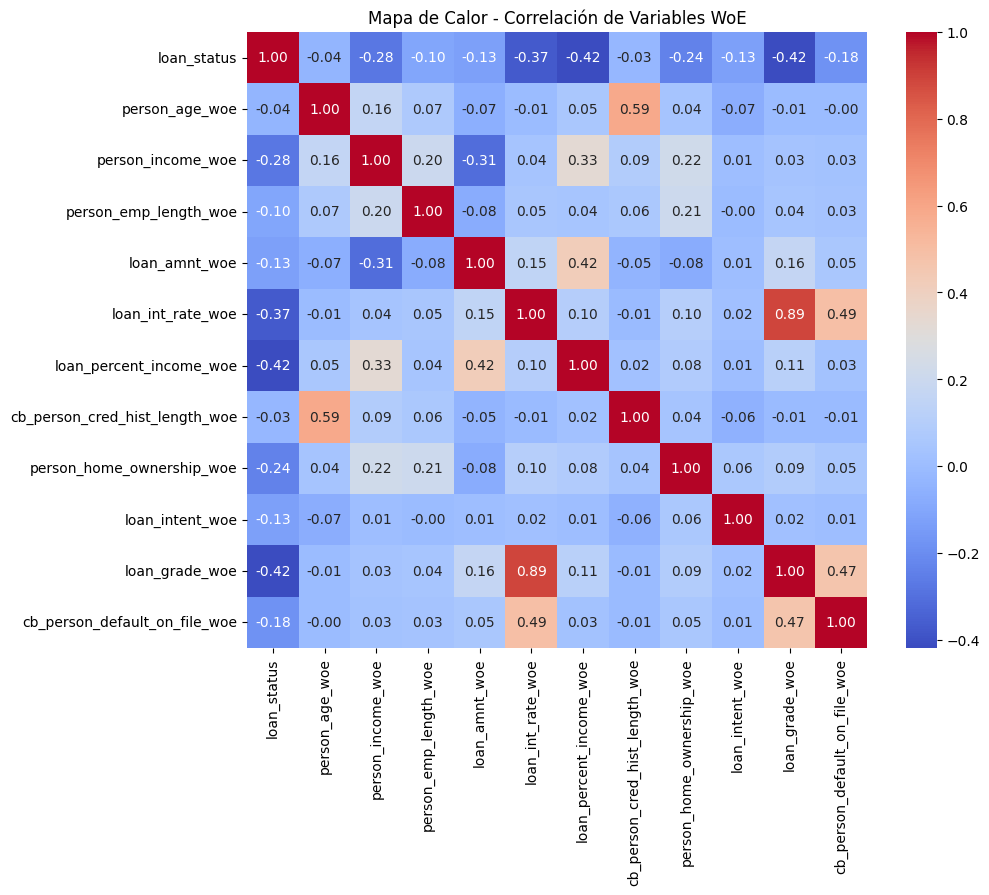

In [110]:
# Calcular la matriz de correlación
corr_matrix = data_woe.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Mostrar el gráfico
plt.title('Mapa de Calor - Correlación de Variables WoE')
plt.show()